### 1. Import the required libraries

In [1]:
import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Activation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 2. Load the dataset after loading the dataset, you have to normalize every image

In [2]:
data = np.load('ORL_faces.npz')
data

#### Analysing the data to extract and utilize it appropriately

In [3]:
data.files

['testY', 'testX', 'trainX', 'trainY']

In [4]:
x_train = data['trainX']
y_train = data['trainY']
x_test = data['testX']
y_test = data['testY']

print(x_train.shape)
print(x_train[0])
print(x_test.shape)
print(x_test[0])

(240, 10304)
[48. 49. 45. ... 47. 46. 46.]
(160, 10304)
[41. 47. 47. ... 35. 37. 38.]


In [5]:
print(y_train.shape)
print(y_train)
print(y_test.shape)
print(y_test)

(240,)
[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15
 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 19 19]
(160,)
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10

#### <span style = 'color:blue'>We have 400 images of 20 types, split into training (240 images) & testing data (160 images)</span>

#### Normalizing the images

In [6]:
x_train = np.array(x_train,dtype='float32')/255
x_test = np.array(x_test,dtype='float32')/255

### 3. Split the dataset

In [7]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

### 4. Transform the images to equal sizes to feed in CNN

Note: All images are of size 112 * 92, and image array size is 10304 (112 * 92 = 10304)

In [8]:
r = 112
c = 92

x_train = x_train.reshape(x_train.shape[0], r, c)
x_validation = x_validation.reshape(x_validation.shape[0], r, c)
x_test = x_test.reshape(x_test.shape[0], r, c)

print(x_train[0])
print(x_train[0].shape)

[[0.44705883 0.43137255 0.44705883 ... 0.44705883 0.43137255 0.43529412]
 [0.43137255 0.44705883 0.42745098 ... 0.42745098 0.42352942 0.44313726]
 [0.4392157  0.4392157  0.44313726 ... 0.4392157  0.4392157  0.4392157 ]
 ...
 [0.20392157 0.21176471 0.20392157 ... 0.38431373 0.38039216 0.39215687]
 [0.18431373 0.22745098 0.18431373 ... 0.38039216 0.38431373 0.36862746]
 [0.1882353  0.20784314 0.22352941 ... 0.40784314 0.3529412  0.39607844]]
(112, 92)


### 5. Build a CNN model that has 3 main layers:

    i.   Convolutional Layer
    ii.  Pooling Layer
    iii. Fully Connected Layer

In [9]:
#Initializing the CNN model
model = Sequential()

#Convolution layer that takes input of size 112,92,1 
model.add(Convolution2D(64, kernel_size=(3,3), activation='relu', input_shape = (112,92,1)))

#Max pooling layer
model.add(MaxPooling2D(2,2))

#Flattening before passing through the dense layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))

#Output layer for 20 classes
model.add(Dense(20, activation='softmax')) 

#Compile the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 90, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 45, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 158400)            0         
                                                                 
 dense (Dense)               (None, 256)               40550656  
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 40,556,436
Trainable params: 40,556,436
Non-trainable params: 0
____________________________________________

### 6. Train the model

In [10]:
batch_size = 64
epochs = 25

history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 2,
                    validation_data = (x_validation, y_validation))

# Accuracy score using the evalute function
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
4/4 - 4s - loss: 10.6531 - accuracy: 0.0602 - val_loss: 12.3869 - val_accuracy: 0.0000e+00 - 4s/epoch - 1s/step
Epoch 2/25
4/4 - 2s - loss: 7.9074 - accuracy: 0.0880 - val_loss: 5.1888 - val_accuracy: 0.1667 - 2s/epoch - 594ms/step
Epoch 3/25
4/4 - 2s - loss: 4.6051 - accuracy: 0.1343 - val_loss: 3.9527 - val_accuracy: 0.2083 - 2s/epoch - 596ms/step
Epoch 4/25
4/4 - 2s - loss: 3.0596 - accuracy: 0.2639 - val_loss: 2.9491 - val_accuracy: 0.2083 - 2s/epoch - 592ms/step
Epoch 5/25
4/4 - 2s - loss: 2.3300 - accuracy: 0.3426 - val_loss: 2.3181 - val_accuracy: 0.3333 - 2s/epoch - 607ms/step
Epoch 6/25
4/4 - 3s - loss: 1.7994 - accuracy: 0.5509 - val_loss: 2.3028 - val_accuracy: 0.3333 - 3s/epoch - 677ms/step
Epoch 7/25
4/4 - 2s - loss: 1.3753 - accuracy: 0.7315 - val_loss: 1.6834 - val_accuracy: 0.6250 - 2s/epoch - 513ms/step
Epoch 8/25
4/4 - 2s - loss: 0.9676 - accuracy: 0.9074 - val_loss: 1.2672 - val_accuracy: 0.8750 - 2s/epoch - 596ms/step
Epoch 9/25
4/4 - 2s - loss: 0.7016 - 

### 7. Plot the result

Plotting the loss

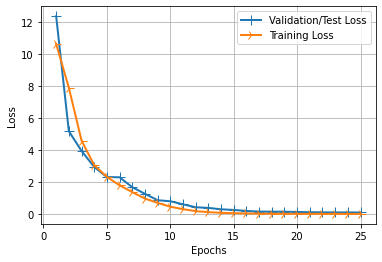

In [11]:
history_dict = history.history

# Extract the loss and validation losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Get the number of epochs and create an array up to that number using range()
epochs = range(1, len(loss_values) + 1)

# Plot line charts for both Validation and Training Loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Plotting the accuracy values

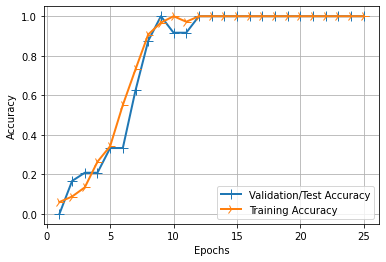

In [12]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

### 8. Iterate the model until the accuracy is above 90%

#### <span style ='color:blue'>The test accuracy of the above model is already above 93%</span>

In [13]:
print('Test accuracy:', round(score[1]*100, 2),'%')

Test accuracy: 93.12 %
